<a href="https://colab.research.google.com/github/yash-02/NLP/blob/main/NLP/Email%20Spam%7C%20Ham%20classifier%20using%20BERT/%20Email_Spam_Ham_classifier_using_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [10]:
import pandas as pd

df = pd.read_csv("sms_spam.csv",encoding= 'unicode_escape')
df.head(5)

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df['type'].value_counts()

ham     4827
spam     747
Name: type, dtype: int64

This dataset tooks unbalance: 15% spam emails, 85% ham emails: This indicates class imbalance

In [12]:
df_spam = df[df['type']== 'spam']
df_spam.shape

(747, 2)

In [13]:
df_ham = df[df['type'] == 'ham']
df_ham.shape

(4827, 2)

saprating spam and ham instances

In [14]:
df_ham_downsampled = df_ham.sample(747)
df_ham_downsampled.shape

(747, 2)

Make balance data by taking same number of spam and ham instances

In [15]:
df_blanced = pd.concat([df_ham_downsampled,df_spam])
df_blanced

,type,text
2783,ham,Well at this right I'm gonna have to get up an...
1293,ham,Da my birthdate in certificate is in april but...
4766,ham,if you text on your way to cup stop that shoul...
1660,ham,"Yeah, where's your class at?"
2552,ham,I'm done. C ü there.
...,...,...
5539,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5542,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5549,spam,Had your contract mobile 11 Mnths? Latest Moto...
5568,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [16]:
dataset = tf.random.shuffle(df_blanced)
dataset

<tf.Tensor: shape=(1494, 2), dtype=string, numpy=
array([[b'spam',
        b'URGENT We are trying to contact you Last weekends draw shows u have won a \xc2\xa31000 prize GUARANTEED Call 09064017295 Claim code K52 Valid 12hrs 150p pm'],
       [b'ham',
        b'Desires- u going to doctor 4 liver. And get a bit stylish. Get ur hair managed. Thats it.'],
       [b'ham', b'Delhi and chennai still silent.'],
       ...,
       [b'spam',
        b'PRIVATE! Your 2003 Account Statement for <fone no> shows 800 un-redeemed S. I. M. points. Call 08715203656 Identifier Code: 42049 Expires 26/10/04'],
       [b'spam',
        b'Do you want a new Video phone? 600 anytime any network mins 400 Inclusive Video calls AND downloads 5 per week Free delTOMORROW call 08002888812 or reply NOW'],
       [b'spam',
        b'You will recieve your tone within the next 24hrs. For Terms and conditions please see Channel U Teletext Pg 750']],
      dtype=object)>

Shuffling the data which helps the training converge fast. it prevents any bias during the training. it prevents the model from learning the order of the training.

In [17]:
df_shuffled = df_blanced.sample(frac=1)
df_shuffled

,type,text
614,ham,THANX4 TODAY CER IT WAS NICE 2 CATCH UP BUT WE...
1060,spam,EASTENDERS TV Quiz. What FLOWER does DOT compa...
3028,ham,You still at the game?
3014,spam,FREE UNLIMITED HARDCORE PORN direct 2 your mob...
3220,ham,Me too baby! I promise to treat you well! I be...
...,...,...
3407,ham,"""HEY DAS COOL... IKNOW ALL 2 WELLDA PERIL OF S..."
1597,spam,As a Registered Subscriber yr draw 4 a £100 gi...
1458,spam,CLAIRE here am havin borin time & am now alone...
3496,spam,Wan2 win a Meet+Greet with Westlife 4 U or a m...


taking spam as 0 and ham as 1

In [18]:
df_shuffled['spam'] = df_blanced['type'].apply(lambda x:  0 if x =='spam' else 1)

In [19]:
df_balanced  = df_shuffled

Split it into training and test data set

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['text'],df_balanced['spam'], stratify=df_balanced['spam'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1120,), (374,), (1120,), (374,))

Now lets import BERT model and get embeding vectors for few sample statements

In [21]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

Get embeding vectors for few sample words. Compare them using cosine similarity

In [22]:

def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up", 
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.84351724, -0.51327276, -0.88845724, ..., -0.74748844,
        -0.7531474 ,  0.91964495],
       [-0.87208337, -0.5054394 , -0.94446665, ..., -0.85847497,
        -0.71745324,  0.8808295 ]], dtype=float32)>

In [23]:
e = get_sentence_embeding([
    "banana", 
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
]
)


In [24]:
#Values near to 1 means they are similar. 0 means they are very different. Above you can use comparing "banana" vs "grapes" you get 0.99 similarity as they both are fruits

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[1]])

array([[0.9911088]], dtype=float32)

Values near to 1 means they are similar. 0 means they are very different. Above you can use comparing "banana" vs "grapes" you get 0.99 similarity as they both are fruits

In [26]:
cosine_similarity([e[0]],[e[-1]])

array([[0.95718396]], dtype=float32)

In [27]:
cosine_similarity([e[1]],[e[4]])

array([[0.9166689]], dtype=float32)

We are using Functional model to Build the model

In [29]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [30]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [31]:
model.fit(X_train, y_train, epochs=10)


Epoch 1/10
35/35 [==============================] - 20s 299ms/step - loss: 0.6245 - accuracy: 0.6768 - precision: 0.6833 - recall: 0.6589
Epoch 2/10
35/35 [==============================] - 11s 306ms/step - loss: 0.5137 - accuracy: 0.7812 - precision: 0.7749 - recall: 0.7929
Epoch 3/10
35/35 [==============================] - 11s 305ms/step - loss: 0.4396 - accuracy: 0.8473 - precision: 0.8663 - recall: 0.8214
Epoch 4/10
35/35 [==============================] - 11s 308ms/step - loss: 0.3853 - accuracy: 0.8884 - precision: 0.9006 - recall: 0.8732
Epoch 5/10
35/35 [==============================] - 11s 310ms/step - loss: 0.3577 - accuracy: 0.8902 - precision: 0.9069 - recall: 0.8696
Epoch 6/10
35/35 [==============================] - 11s 313ms/step - loss: 0.3385 - accuracy: 0.8875 - precision: 0.8960 - recall: 0.8768
Epoch 7/10
35/35 [==============================] - 11s 319ms/step - loss: 0.3251 - accuracy: 0.8920 - precision: 0.9072 - recall: 0.8732
Epoch 8/10
35/35 [================

In [32]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [35]:
model.evaluate(X_test,y_test)

12/12 [==============================] - 5s 301ms/step - loss: 0.2480 - accuracy: 0.9358 - precision: 0.9312 - recall: 0.9412


[0.24800816178321838,
 0.9358288645744324,
 0.9312169551849365,
 0.9411764740943909]

In [36]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

12/12 [==============================] - 5s 358ms/step


In [37]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[174,  13],
       [ 11, 176]])

Text(33.0, 0.5, 'Truth')

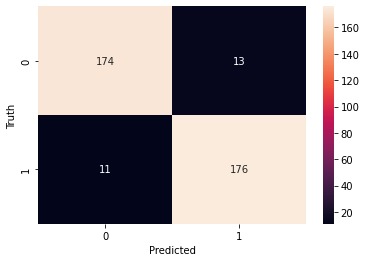

In [39]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       187
           1       0.93      0.94      0.94       187

    accuracy                           0.94       374
   macro avg       0.94      0.94      0.94       374
weighted avg       0.94      0.94      0.94       374



WE get test: accuracy: 0.9358